In [88]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [89]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

#Target- Survived(Classification)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
data.drop(['PassengerId','Name','Ticket'], axis =1 , inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# EDA

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [92]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [93]:

print(f"There are {data.isna().sum().sum()} missing values which represents {round((data.isna().sum().sum() / (data.shape[0] * data.shape[1])) * 100, 2)}% of the data.")

There are 866 missing values which represents 10.8% of the data.


<Axes: ylabel='Frequency'>

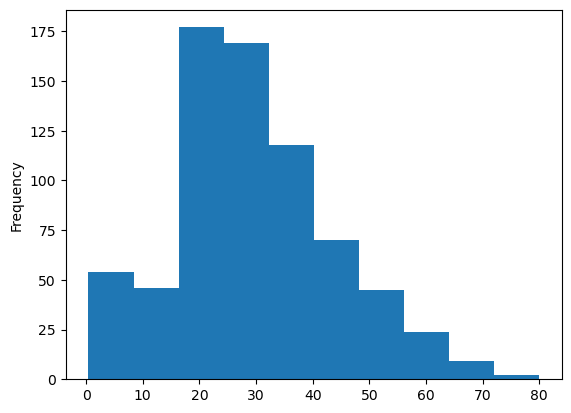

In [94]:
data['Age'].plot(kind='hist')


-Exploring Age

<Axes: xlabel='Age', ylabel='Density'>

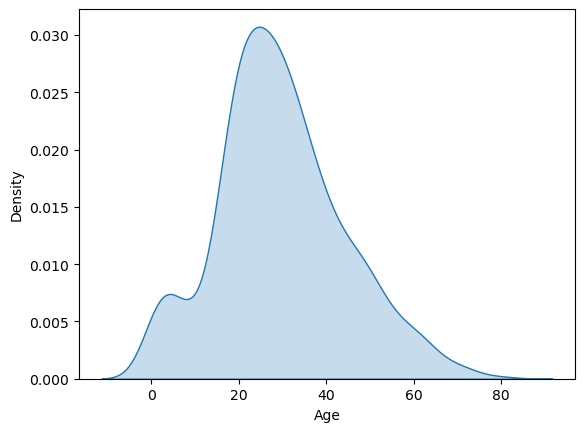

In [95]:
sns.kdeplot(data['Age'], fill = True)


<Axes: xlabel='Age', ylabel='Density'>

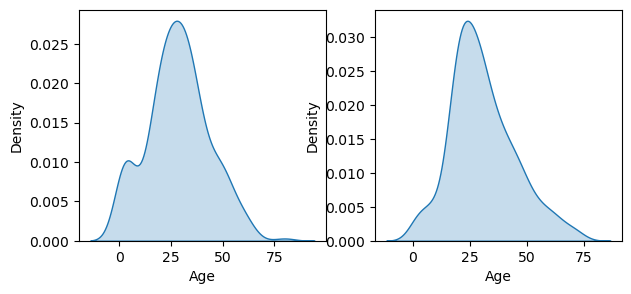

In [96]:
alive = data[data['Survived'] == True]
dead = data[data['Survived'] == False]

plt.figure(figsize = (7,3))
plt.subplot(1,2,1)
sns.kdeplot(alive['Age'], fill = True)
plt.subplot(1,2,2)
sns.kdeplot(dead['Age'], fill = True)

<Axes: xlabel='Age', ylabel='Density'>

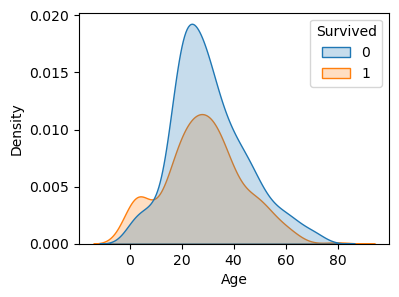

In [97]:
# Lets compare them on same scale
plt.figure(figsize = (4,3))
sns.kdeplot(x='Age', hue ='Survived', data= data, fill = True)

In [98]:
# Replacing NA values of age with mean

In [99]:
mean = data['Age'].mean()
data['Age'].fillna(mean,inplace =True)

# Exploring Gender

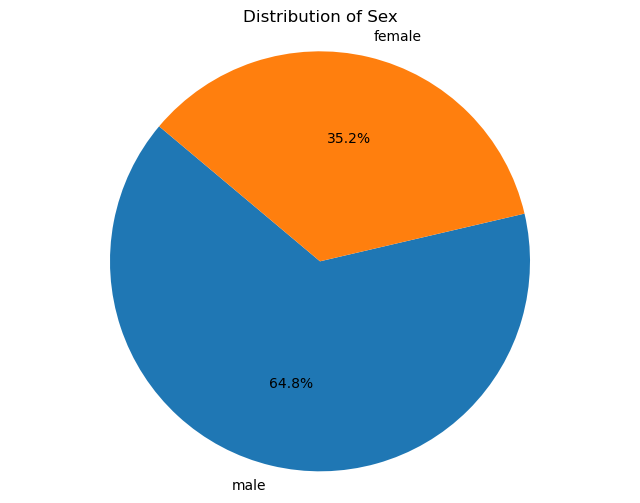

In [102]:
sex_counts = data['Sex'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [105]:
women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [106]:
men = data.loc[data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Exploring cabin class

In [43]:
cabin = data['Cabin']
cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [44]:
cabin_count = []
cabin_deck = []

for row in cabin:
    if pd.isna(row):
        cabin_count.append(np.nan)
        cabin_deck.append(np.nan)
    else:
        cabin_names = row.split()
        cabin_count.append(len(cabin_names))
        cabin_deck.append(cabin_names[0][0])
        
cabin_count = pd.Series(cabin_count)
cabin_deck = pd.Series(cabin_deck)

<Axes: >

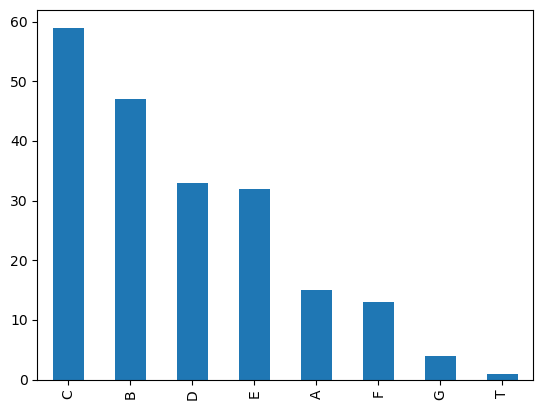

In [45]:
cabin_deck.value_counts().plot(kind='bar')

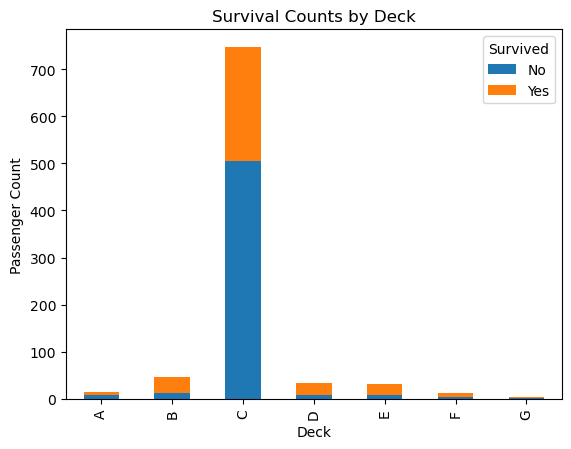

In [113]:
if 'Survived' not in data.columns:
    raise ValueError("Survived column not found in the dataset.")
else:
    # Create a new DataFrame with 'Cabin_Deck', 'Survived' columns
    deck_survived_df = pd.DataFrame({'Cabin_Deck': cabin_deck, 'Survived': data['Survived']})

# Filter out rows with missing deck information
deck_survived_df = deck_survived_df.dropna(subset=['Cabin_Deck'])

# Group by 'Cabin_Deck' and calculate survival counts
survival_counts = deck_survived_df.groupby('Cabin_Deck')['Survived'].value_counts().unstack().fillna(0)

# Plot histogram
survival_counts.plot(kind='bar', stacked=True)
plt.xlabel('Deck')
plt.ylabel('Passenger Count')
plt.title('Survival Counts by Deck')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [46]:
cabin_deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
dtype: int64

In [47]:
cabin_deck = cabin_deck.replace('T','C')
cabin_deck.value_counts()

C    60
B    47
D    33
E    32
A    15
F    13
G     4
dtype: int64

In [48]:
mode = cabin_count.mode().iloc[0] # Note that cabin_count is still not continous
cabin_count.fillna(mode, inplace =True)
cabin_count.isna().sum()

0

In [49]:
mode= cabin_deck.mode().iloc[0]
cabin_deck.fillna(mode, inplace =True)
cabin_deck.isna().sum()

0

In [50]:
data.drop('Cabin', axis = 1, inplace = True) # Drop cabin
data['cabin_count'] = cabin_count
data['cabin_deck'] = cabin_deck
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_count,cabin_deck
0,0,3,male,22.0,1,0,7.2500,S,1.0,C
1,1,1,female,38.0,1,0,71.2833,C,1.0,C
2,1,3,female,26.0,0,0,7.9250,S,1.0,C
3,1,1,female,35.0,1,0,53.1000,S,1.0,C
4,0,3,male,35.0,0,0,8.0500,S,1.0,C


In [51]:
data['cabin_count'] = data['cabin_count'].astype(str)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_count,cabin_deck
0,0,3,male,22.0,1,0,7.2500,S,1.0,C
1,1,1,female,38.0,1,0,71.2833,C,1.0,C
2,1,3,female,26.0,0,0,7.9250,S,1.0,C
3,1,1,female,35.0,1,0,53.1000,S,1.0,C
4,0,3,male,35.0,0,0,8.0500,S,1.0,C


In [52]:
emb = data['Embarked']
emb.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
mode = emb.mode().iloc[0]
data['Embarked'].fillna(mode, inplace = True)
data['Embarked'].isna().sum()

0

In [54]:
data.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
cabin_count    0
cabin_deck     0
dtype: int64

# Infrencing
The analysis of the Titanic dataset highlights significant disparities in survival rates based on age, class, and gender. The tragedy revealed that a substantial loss of 809 lives occurred due to the insufficient number of lifeboats. The examination of age groups showed varying survival outcomes, with Senior Adults facing lower rates and Youths exhibiting higher survival numbers. Gender-wise, females had a notably higher survival rate compared to males. Additionally, a linear relationship between first-class status and survival rates suggests a potential class-based influence on survival likelihood. This analysis underscores the importance of considering demographic factors in understanding and improving outcomes during maritime disasters

# One Hot encoding all categorical values

In [55]:
data = pd.get_dummies(data) 
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,cabin_count_2.0,cabin_count_3.0,cabin_count_4.0,cabin_deck_A,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Model

1. Splitting data to train test
2. Building 5 models:
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - Gradient Bossting
    - Ensemble model
    
3. Comparing models and finding best model

In [56]:
X = data.drop('Survived', axis =1)
y = data['Survived']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 1. Logistic Regression

In [59]:
lgr=LogisticRegression()

In [69]:
lgr.fit(X_train, y_train)
ypred = lgr.predict(X_test)
accuracy = accuracy_score(y_test, ypred)
cm=confusion_matrix(y_test,ypred)
report=classification_report(y_test,ypred)

C:\Users\RAHUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print(accuracy)
print(cm)
print(report)

0.8470149253731343
[[151  19]
 [ 22  76]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       170
           1       0.80      0.78      0.79        98

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.85      0.85      0.85       268



# 2. Decision Tree

In [66]:
dt=DecisionTreeClassifier(criterion='gini')

In [67]:
dt.fit(X_train, y_train)
ypred = dt.predict(X_test)
accuracy = accuracy_score(y_test, ypred)
cm=confusion_matrix(y_test,ypred)
report=classification_report(y_test,ypred)

In [68]:
print(accuracy)
print(cm)
print(report)

0.7835820895522388
[[138  32]
 [ 26  72]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       170
           1       0.69      0.73      0.71        98

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [75]:
gini_index = dt.tree_.impurity[0]
print("Gini Index:", gini_index)

Gini Index: 0.47652198109391464


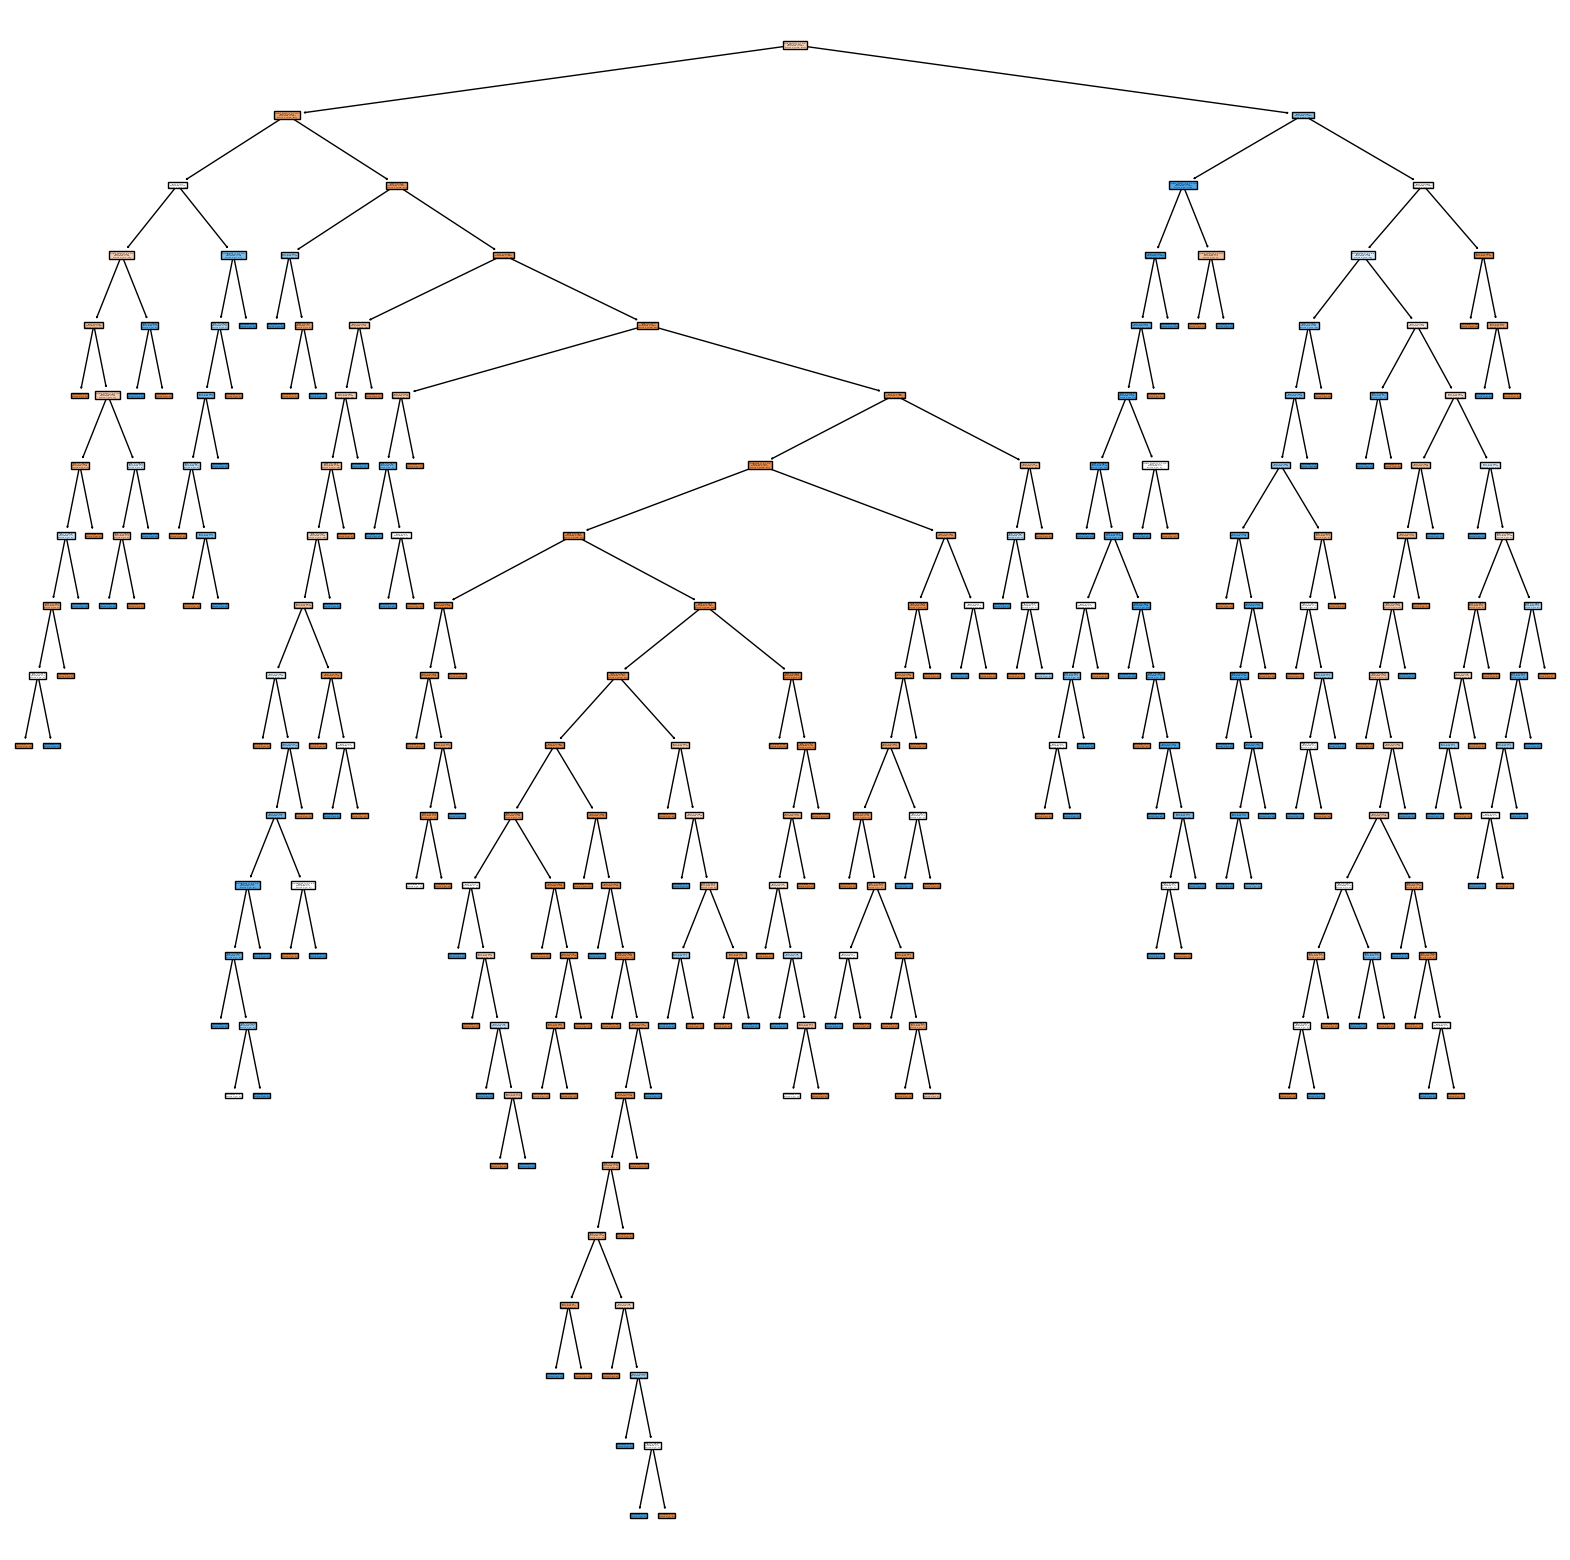

In [76]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

# 3a. Random Forest 

In [77]:
rf=RandomForestClassifier()


In [78]:
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
accuracy = accuracy_score(y_test, ypred)
cm=confusion_matrix(y_test,ypred)
report=classification_report(y_test,ypred)

In [79]:
print(accuracy)
print(cm)
print(report)

0.8283582089552238
[[145  25]
 [ 21  77]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       170
           1       0.75      0.79      0.77        98

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



# 3b.Random Forest with Hyperparamter 

In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [25,50,75],  # Number of trees in the forest
    'max_depth': [3, 5, 7],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
ypred = best_rf.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred)
report = classification_report(y_test, ypred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 25}
Accuracy: 0.8582089552238806
Confusion Matrix:
 [[156  14]
 [ 24  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       170
           1       0.84      0.76      0.80        98

    accuracy                           0.86       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.86      0.86      0.86       268



# 4a. Gradient Boosting

In [81]:
gb=GradientBoostingClassifier()

In [82]:
gb.fit(X_train, y_train)
ypred = gb.predict(X_test)
accuracy = accuracy_score(y_test, ypred)
cm=confusion_matrix(y_test,ypred)
report=classification_report(y_test,ypred)

In [83]:
print(accuracy)
print(cm)
print(report)

0.8619402985074627
[[156  14]
 [ 23  75]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       170
           1       0.84      0.77      0.80        98

    accuracy                           0.86       268
   macro avg       0.86      0.84      0.85       268
weighted avg       0.86      0.86      0.86       268



# 4b. Gradient boosting with hyperparameter tuning

In [84]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}


# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_gb = grid_search.best_estimator_
ypred = best_gb.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred)
report = classification_report(y_test, ypred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.8768656716417911
Confusion Matrix:
 [[160  10]
 [ 23  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       170
           1       0.88      0.77      0.82        98

    accuracy                           0.88       268
   macro avg       0.88      0.85      0.86       268
weighted avg       0.88      0.88      0.87       268



# Ensemble Modelling -soft voting

In [85]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Create the ensemble model with soft voting
ensemble_model = VotingClassifier(
    estimators=[('lr', log_reg), ('dt', decision_tree), ('rf', random_forest), ('gb', gradient_boosting)],
    voting='soft',  # Using 'soft' voting, which takes into account probability estimates
    flatten_transform=True  # Ensures that the input features are flattened before being passed to the classifiers
)

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

# Make predictions
ypred = ensemble_model.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred)
report = classification_report(y_test, ypred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

C:\Users\RAHUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8470149253731343
Confusion Matrix:
 [[146  24]
 [ 17  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       170
           1       0.77      0.83      0.80        98

    accuracy                           0.85       268
   macro avg       0.83      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



 # Inference:

Logistic Regression:
Accuracy: 85%
Precision: 87% for non-survivors, 80% for survivors
Recall: 89% for non-survivors, 78% for survivors
F1-score: 88% for non-survivors, 79% for survivors

Decision Tree:
Accuracy: 78%
Precision: 84% for non-survivors, 69% for survivors
Recall: 81% for non-survivors, 73% for survivors
F1-score: 83% for non-survivors, 71% for survivors

Random Forest:
Accuracy: 83%
Precision: 87% for non-survivors, 75% for survivors
Recall: 85% for non-survivors, 79% for survivors
F1-score: 86% for non-survivors, 77% for survivors

Random Forest with Hyperparameters:
Accuracy: 86%
Precision: 87% for non-survivors, 84% for survivors
Recall: 92% for non-survivors, 76% for survivors
F1-score: 89% for non-survivors, 80% for survivors

Gradient Boosting:
Accuracy: 86%
Precision: 87% for non-survivors, 84% for survivors
Recall: 92% for non-survivors, 77% for survivors
F1-score: 89% for non-survivors, 80% for survivors

Gradient Boosting with Hyperparameters:
Accuracy: 88%
Precision: 87% for non-survivors, 88% for survivors
Recall: 94% for non-survivors, 77% for survivors
F1-score: 91% for non-survivors, 82% for survivors

Ensemble Model:
Accuracy: 85%
Precision: 90% for non-survivors, 77% for survivors
Recall: 86% for non-survivors, 83% for survivors
F1-score: 88% for non-survivors, 80% for survivors
Comparison:

Accuracy: The models perform relatively well, with accuracy ranging from 78% to 88%. Gradient Boosting with hyperparameters achieved the highest accuracy of 88%.

Precision: Random Forest with hyperparameters and Gradient Boosting with hyperparameters achieved the highest precision for both non-survivors and survivors.

Recall: Random Forest with hyperparameters and Gradient Boosting with hyperparameters achieved the highest recall for non-survivors, while Logistic Regression achieved the highest recall for survivors.

F1-score: Gradient Boosting with hyperparameters achieved the highest F1-score for both non-survivors and survivors.

Overall: Gradient Boosting with hyperparameters appears to be the best-performing model in terms of accuracy, precision, recall, and F1-score. However, Random Forest with hyperparameters also performed well across all metrics.